# Modeling: Regression
Lecture Data Engineering and Analytics<br>
Eva Zangerle

In [2]:
import os
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
%load_ext watermark
%watermark -a "Eva Zangerle" --updated --date --time --iversions --githash

Author: Eva Zangerle

Last updated: 2022-11-30 07:18:02



In [3]:
# specify data directory
data_dir = "../data"

In [3]:
# show all outputs
InteractiveShell.ast_node_interactivity = "all"

## Linear Regression

In the following, we will look into linear regression. This code is adapted from (PyML) and we are going to rely on the widely used Boston housing dataset to showcase regression methods, which holds the following features for 506 houses: 
* crim: per capita crime rate by town.
* zn: proportion of residential land zoned for lots over 25,000 sq.ft.
* indus: proportion of non-retail business acres per town.
* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox: nitrogen oxides concentration (parts per 10 million).
* rm: average number of rooms per dwelling.
* age: proportion of owner-occupied units built prior to 1940.
* dis: weighted mean of distances to five Boston employment centres.
* rad: index of accessibility to radial highways.
* tax: full-value property-tax rate per \$10,000.
* ptratio: pupil-teacher ratio by town.
* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* lstat: lower status of the population (percent).
* medv: median value of owner-occupied homes in \$1000s (**target variable**)


Cf. https://www.kaggle.com/c/boston-housing for further details of the datatset.

In [4]:
# read housing data
fieldnames = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
housing = pd.read_csv(
    os.path.join(data_dir, "housing.csv"), sep="\s+", names=fieldnames
)

In [5]:
# get first impression on data
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


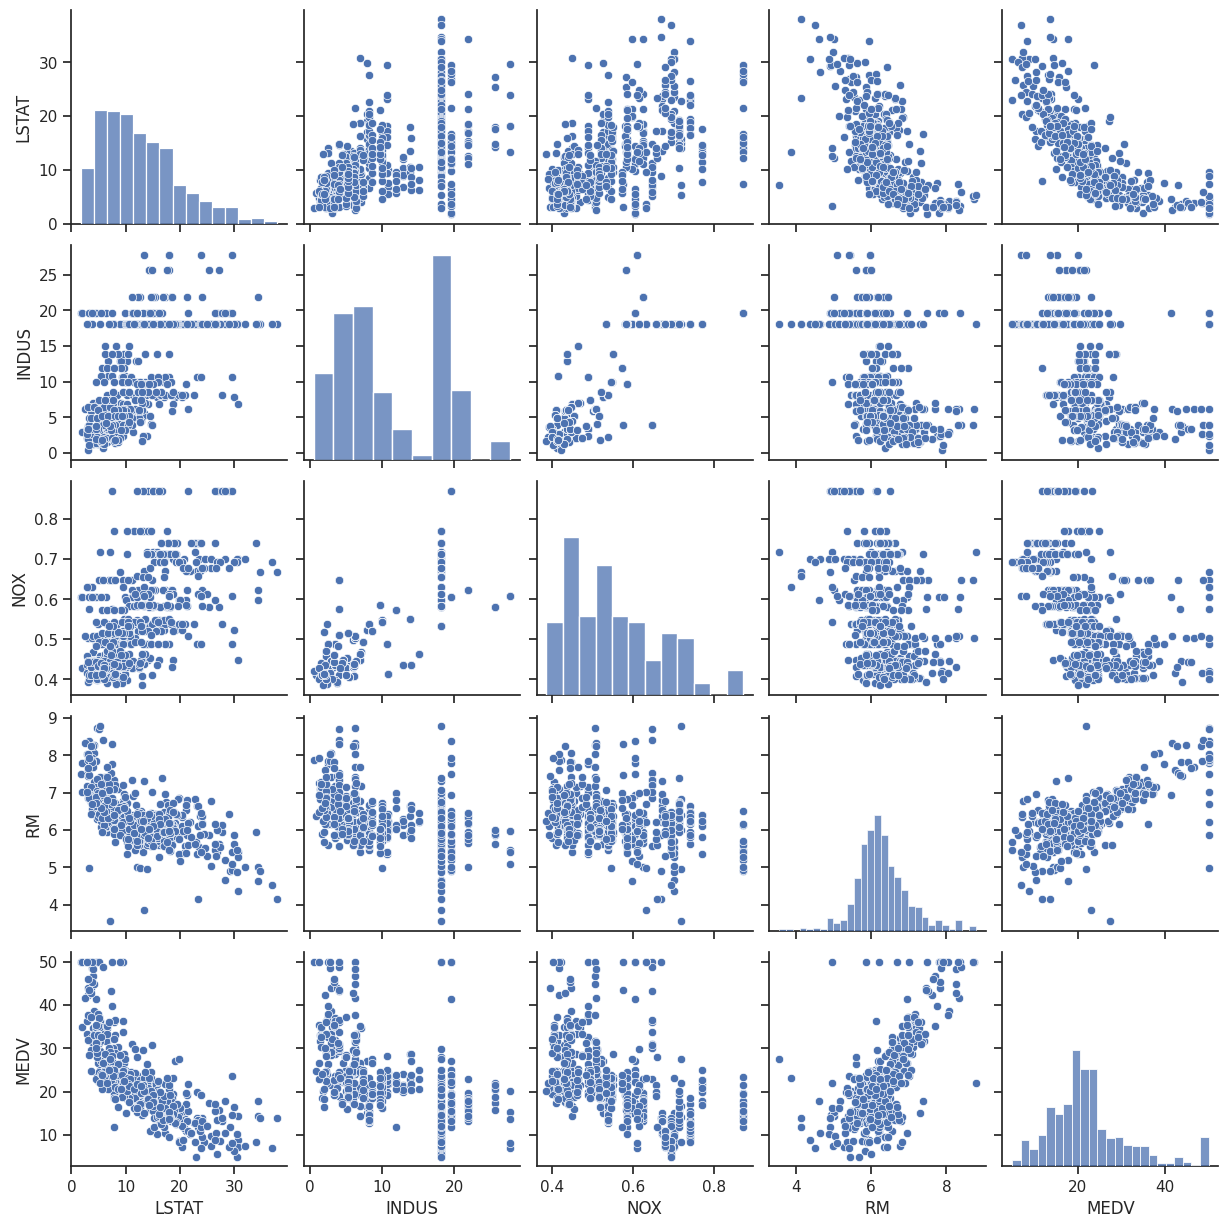

In [6]:
# investigate different features - which ones to pick for regression?
columns = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.set_theme(style="ticks")
sns.pairplot(housing[columns])
plt.show()

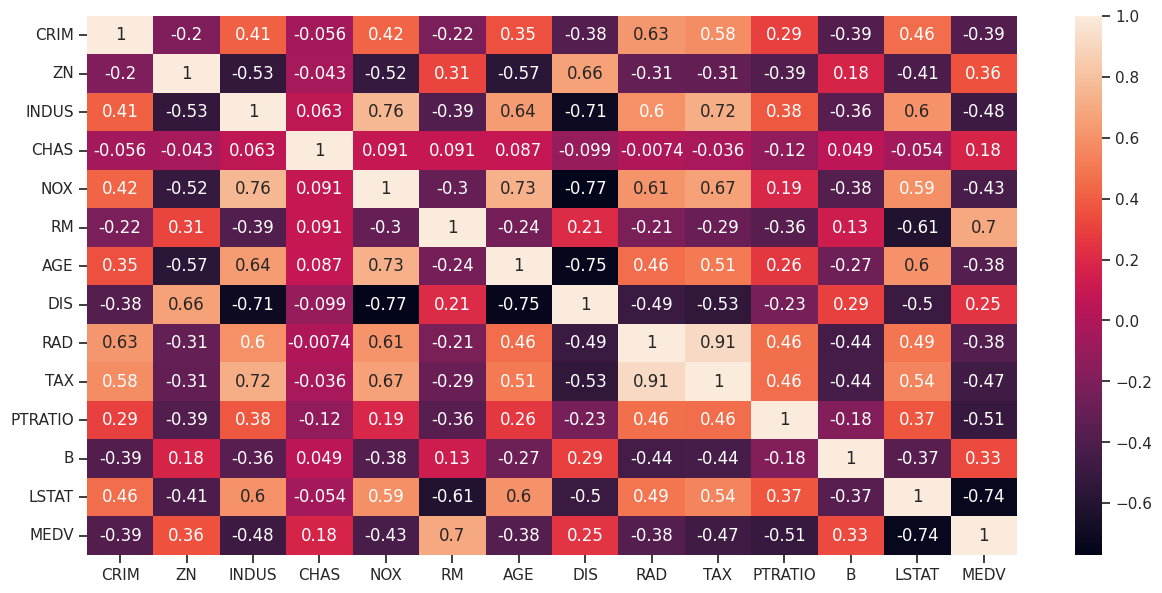

In [7]:
# correlation of features --> use the features that have
# high correlation with our target variable (MEDV) for regression
plt.figure(figsize=(15, 7))
sns.heatmap(housing.corr(), annot=True);

In a next step, we apply linear regression. We will use the MEDV (median value) column as target and RM (average number of rooms) as explanatory variable.

In [8]:
# define X, y
X = housing[["RM"]].values
y = housing[["MEDV"]].values

In [9]:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
print(f"Slope: {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_[0]}")

LinearRegression()

Slope: [9.10210898]
Intercept: -34.67062077643857


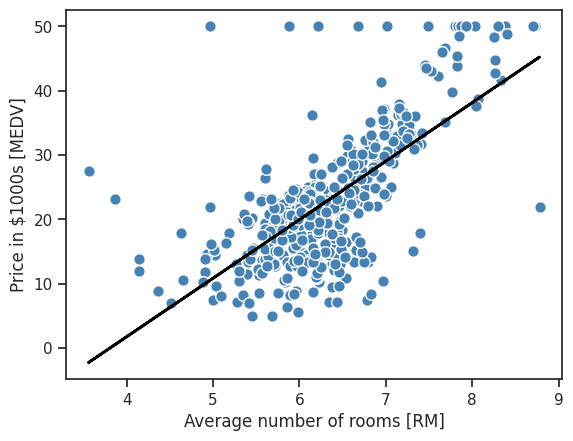

In [10]:
# visualize
plt.scatter(X, y, c="steelblue", edgecolor="white", s=70)
plt.plot(X, linreg.predict(X), color="black", lw=2)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV]");

## Evaluation (+ Multiple Regression)

For the evaluation of our regressors, we will rely on traditional experimental setups, metrics and also will investigate residual plots.

In [11]:
# define X, y - now we are using multiple regression
# based on multiple attributes
features = ["RM", "AGE", "TAX", "PTRATIO"]
X = housing[features].values
y = housing[["MEDV"]].values

In [12]:
# hold-out scenario
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
linreg.coef_

LinearRegression()

array([[ 7.05718172, -0.04084239, -0.00840148, -1.07012867]])

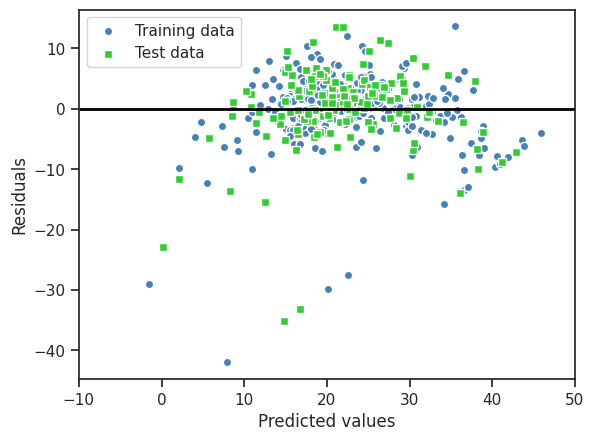

In [14]:
# create residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="steelblue",
    marker="o",
    edgecolor="white",
    label="Training data",
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="limegreen",
    marker="s",
    edgecolor="white",
    label="Test data",
)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
plt.xlim([-10, 50]);

In [15]:
f"MAE train: {mean_absolute_error(y_train, y_train_pred):.5f}, \
  test: {mean_absolute_error(y_test, y_test_pred):.5f}"
f"MSE train: {mean_squared_error(y_train, y_train_pred):.5f}, \
  test: {mean_squared_error(y_test, y_test_pred):.5f}"
f"R2 train: {r2_score(y_train, y_train_pred):.5f}, \
  test: {r2_score(y_test, y_test_pred):.5f}"

'MAE train: 3.53190,   test: 4.24826'

'MSE train: 29.65272,   test: 42.92281'

'R2 train: 0.65018,   test: 0.48451'

## Regularization

In [16]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

Lasso(alpha=0.1)

[ 6.83719021 -0.04140671 -0.00861558 -1.067578  ]


In [17]:
f"MAE train: {mean_absolute_error(y_train, y_train_pred):.5f}, \
  test: {mean_absolute_error(y_test, y_test_pred):.5f}"
f"MSE train: {mean_squared_error(y_train, y_train_pred):.5f}, \
  test: {mean_squared_error(y_test, y_test_pred):.5f}"
f"R2 train: {r2_score(y_train, y_train_pred):.5f}, \
  test: {r2_score(y_test, y_test_pred):.5f}"

'MAE train: 3.54719,   test: 4.26185'

'MSE train: 29.67489,   test: 42.92301'

'R2 train: 0.64991,   test: 0.48450'

In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

Ridge()

[[ 7.00921231 -0.04099235 -0.00841914 -1.07429011]]


In [19]:
f"MAE train: {mean_absolute_error(y_train, y_train_pred):.5f}, \
  test: {mean_absolute_error(y_test, y_test_pred):.5f}"
f"MSE train: {mean_squared_error(y_train, y_train_pred):.5f}, \
  test: {mean_squared_error(y_test, y_test_pred):.5f}"
f"R2 train: {r2_score(y_train, y_train_pred):.5f}, \
  test: {r2_score(y_test, y_test_pred):.5f}"

'MAE train: 3.53492,   test: 4.25317'

'MSE train: 29.65365,   test: 42.93816'

'R2 train: 0.65016,   test: 0.48432'

In [20]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print(elanet.coef_)

ElasticNet()

[ 2.74041183 -0.0538591  -0.01125424 -1.23193834]


In [21]:
f"MAE train: {mean_absolute_error(y_train, y_train_pred):.5f}, \
  test: {mean_absolute_error(y_test, y_test_pred):.5f}"
f"MSE train: {mean_squared_error(y_train, y_train_pred):.5f}, \
  test: {mean_squared_error(y_test, y_test_pred):.5f}"
f"R2 train: {r2_score(y_train, y_train_pred):.5f}, \
  test: {r2_score(y_test, y_test_pred):.5f}"

'MAE train: 4.22422,   test: 4.93542'

'MSE train: 37.53699,   test: 51.44401'

'R2 train: 0.55716,   test: 0.38217'

## Decision Tree Regression

In [22]:
# using a Decision Tree
X = housing[["LSTAT"]].values
y = housing["MEDV"].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

Text(0.5, 0, '% lower status of the population [LSTAT]')

Text(0, 0.5, 'Price in $1000s [MEDV]')

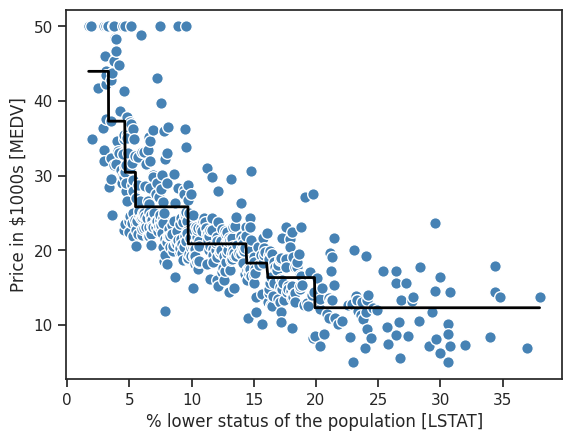

In [23]:
# visualize
def lin_regplot(X, y, model):
    plt.scatter(X, y, c="steelblue", edgecolor="white", s=70)
    plt.plot(X, model.predict(X), color="black", lw=2)
    return


sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000s [MEDV]")
# plt.savefig('images/10_14.png', dpi=300)
plt.show()

In [24]:
# using a Random Forest
X = housing.iloc[:, :-1].values
y = housing["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

forest = RandomForestRegressor(
    n_estimators=1000, criterion="squared_error", random_state=1, n_jobs=-1
)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [25]:
f"MAE train: {mean_absolute_error(y_train, y_train_pred):.5f}, \
  test: {mean_absolute_error(y_test, y_test_pred):.5f}"
f"MSE train: {mean_squared_error(y_train, y_train_pred):.5f}, \
  test: {mean_squared_error(y_test, y_test_pred):.5f}"
f"R2 train: {r2_score(y_train, y_train_pred):.5f}, \
  test: {r2_score(y_test, y_test_pred):.5f}"

'MAE train: 0.86349,   test: 2.34610'

'MSE train: 1.64362,   test: 11.08538'

'R2 train: 0.97946,   test: 0.87726'

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Residuals')

(-10.0, 50.0)

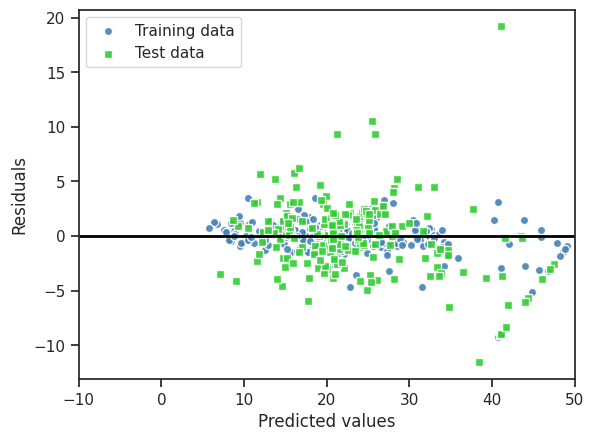

In [26]:
# residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c="steelblue",
    edgecolor="white",
    marker="o",
    s=35,
    alpha=0.9,
    label="Training data",
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="limegreen",
    edgecolor="white",
    marker="s",
    s=35,
    alpha=0.9,
    label="Test data",
)

plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="black")
plt.xlim([-10, 50])